In [11]:
import pandas as pd
import numpy as np
from keras import utils
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical


In [2]:
df = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Preprocessing**

In [3]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Text(0.5, 1.0, 'Number of ham and spam messages')

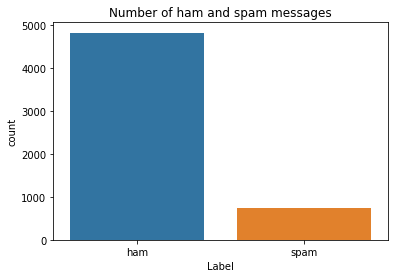

In [4]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [5]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [10]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [12]:
sequences_matrix.shape

(4736, 150)

In [13]:
sequences_matrix.ndim

2

In [15]:
sequences_matrix = np.reshape(sequences_matrix,(4736,150,1))

In [16]:
sequences_matrix.ndim 

3

**RNN Construction**

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding

In [18]:
model = Sequential()
model.add(Embedding(max_words,50,input_length=max_len))

In [19]:
model.add(LSTM(units=64,input_shape = (sequences_matrix.shape[1],1),return_sequences=True))
model.add(LSTM(units=32,return_sequences=True))
model.add(LSTM(units=64,return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(units = 256,activation = 'relu'))
model.add(Dense(units = 1,activation = 'sigmoid'))

In [20]:
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 50)           50000     
_________________________________________________________________
lstm (LSTM)                  (None, 150, 64)           29440     
_________________________________________________________________
lstm_1 (LSTM)                (None, 150, 32)           12416     
_________________________________________________________________
lstm_2 (LSTM)                (None, 150, 64)           24832     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 256)               16640     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2

**Fit on the training data**

In [22]:
M = model.fit(sequences_matrix,Y_train,batch_size=120,epochs=5,validation_split=0.22)

Epoch 1/5
31/31 [==============================] - 12s 374ms/step - loss: 0.2546 - accuracy: 0.9136 - val_loss: 0.1110 - val_accuracy: 0.9683
Epoch 2/5
31/31 [==============================] - 11s 355ms/step - loss: 0.0787 - accuracy: 0.9764 - val_loss: 0.0771 - val_accuracy: 0.9818
Epoch 3/5
31/31 [==============================] - 11s 349ms/step - loss: 0.0540 - accuracy: 0.9854 - val_loss: 0.0728 - val_accuracy: 0.9827
Epoch 4/5
31/31 [==============================] - 11s 369ms/step - loss: 0.0440 - accuracy: 0.9892 - val_loss: 0.0653 - val_accuracy: 0.9827
Epoch 5/5
31/31 [==============================] - 12s 400ms/step - loss: 0.0329 - accuracy: 0.9905 - val_loss: 0.0673 - val_accuracy: 0.9837


**Saving the model**

In [23]:
model.save

<bound method Model.save of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fb7f329b610>>

**Evaluate the model on test set data**

In [25]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [26]:
accr = model.evaluate(test_sequences_matrix,Y_test)

27/27 [==============================] - 1s 39ms/step - loss: 0.0772 - accuracy: 0.9773


In [27]:
l = accr[0]
a =accr[1]
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(l,a))

Test set
  Loss: 0.077
  Accuracy: 0.977
